In [2]:
import numpy as np
import matplotlib.pyplot as plt


def Create_Next_Generation(Best_Two_Individuals,Mutation_Amplitude,Number_Of_Parameters,Number_Of_Individuals_in_Generation):
    Mutation_Amplitude = 0.1
    Individuals = np.array(np.random.rand(Number_Of_Parameters,Number_Of_Individuals_in_Generation))
    Individuals[:,0:2] = Best_Two_Individuals
    Mutations = Mutation_Amplitude*np.random.rand(Number_Of_Parameters,Number_Of_Individuals_in_Generation)
    # This can be done with a vector implementation 
    
    ## Breading and mutating together
    for i in range(2,Number_Of_Individuals_in_Generation):
        Breading_Killing_Vector = np.random.rand(Number_Of_Parameters) > 0.5
        Mutations_Killing_Vector = np.random.rand(Number_Of_Parameters) > 0.5 
        Individuals[:,i] = Breading_Killing_Vector*Best_Two_Individuals[:,0] + (1-Breading_Killing_Vector)*Best_Two_Individuals[:,1] + Mutations_Killing_Vector*Mutations[:,i]

    return Individuals



def Find_Two_Best_Individuals(Cost_Function,Individuals):
    BestCost = np.array(np.zeros(2))
    Best_Two_Individuals = np.zeros((Number_Of_Parameters,2))
    for i in range(0,Number_Of_Individuals_in_Generation):
        if Cost_Function[i] == np.min(Cost_Function):
            Best_Two_Individuals[:,0] = Individuals[:,i]
            BestCost[0] = np.min(Cost_Function)
            Cost_Function[i] = np.max(Cost_Function)
            break

    for i in range(0,Number_Of_Individuals_in_Generation):
        if Cost_Function[i] == np.min(Cost_Function):
            Best_Two_Individuals[:,1] = Individuals[:,i]
            BestCost[1] = np.min(Cost_Function)
            break

    return Best_Two_Individuals


def Optimize_With_Genetic_Algorithm(x,Y,Cost,Mutation_Amplitude,Number_Of_Parameters,Number_Of_Individuals_in_Generation,Number_Of_Generations):
#     plt.figure(1)
#     plt.plot(x,Y)

    Individuals = np.array(np.random.rand(Number_Of_Parameters,Number_Of_Individuals_in_Generation))

    ## Run Genetic algorithm Optimizer
    for generation in range(0,Number_Of_Generations):
        ## Calculate Cost
        Cost_Function1 = Cost.Cost_Function(Y,Individuals)
        
        # Find Parents
        Best_Two_Individuals = Find_Two_Best_Individuals(Cost_Function1,Individuals)
        
        # Create Next Generations
        Individuals =Create_Next_Generation(Best_Two_Individuals,Mutation_Amplitude,Number_Of_Parameters,Number_Of_Individuals_in_Generation)
#         plt.plot(x,Best_Two_Individuals[:,0])


#     plt.figure(2)
#     plt.plot(x,Y)
#     plt.plot(x,Best_Two_Individuals[:,0])
    
    return Best_Two_Individuals[:,0] ## These are the best parameters

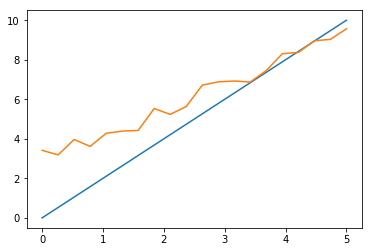

In [4]:
## Using the genetic algorithm

import numpy as np
import matplotlib.pyplot as plt

## Defining Cost Function
class Cost_Function:
    def Cost_Function(self,Y,Individuals): 
        
        ## This should be a cost function to be minimized
        ## This should output the cost / negative fittness - for each of the individuals
        Cost_Function1 = np.zeros(Number_Of_Individuals_in_Generation)
        for i in range(0,Number_Of_Individuals_in_Generation):
            Cost_Function1[i] = np.sum((Y - Individuals[:,i])**2)

        return Cost_Function1


## Defining the hyperparameters
Mutation_Amplitude = 1
Number_Of_Parameters = 20 ## these are the parameters /variables which we want to optimize
Number_Of_Individuals_in_Generation = 10
Number_Of_Generations = 1000


## Defining the target (in the case of fitting)
x = np.linspace(0,5,Number_Of_Parameters)
Y = 2*x

## Getting the cost function object
Cost = Cost_Function()


    
Best_Parameters = Optimize_With_Genetic_Algorithm(x, Y, Cost, Mutation_Amplitude, Number_Of_Parameters, Number_Of_Individuals_in_Generation, Number_Of_Generations)

plt.plot(x,Y)
plt.plot(x,Best_Parameters)

Hello my name is John
